In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_global_mobility = pd.read_csv('Global_Mobility_Report.csv')
df_covid_br = pd.read_csv('covid19.csv')

In [3]:
siglas = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

------------------------------------------------------------------------------------------------------------------------

In [4]:
filter_br = df_global_mobility['country_region_code']=='BR'
df_br_mobility = df_global_mobility[filter_br]

In [5]:
df_br_mobility = df_br_mobility.drop(['country_region'], axis='columns')
df_br_mobility = df_br_mobility.drop(['sub_region_2'], axis='columns')
df_br_mobility.columns = ['codigo_pais','estado','data','perc_varejo_e_lazer','perc_mercearia_e_farmacia','perc_parques','perc_terminais','perc_locais_de_trabalho','perc_residencial']
df_br_mobility = df_br_mobility.reset_index(drop=True)

In [6]:
for i in range(0,len(df_br_mobility.estado)):
    if df_br_mobility.estado[i] == 'Federal District':
        df_br_mobility.estado[i] = 'State of Distrito Federal'

In [7]:
states_br = pd.DataFrame()
states_br = df_br_mobility['estado'].value_counts().reset_index()
states_br.columns = ['estado','valor']

In [8]:
states_br.estado = sorted(states_br.estado)

In [9]:
def mudar_estado(nome,novoNome):
    for i in range(0, len(df_br_mobility.estado)):
        if df_br_mobility.estado[i] == nome:
            df_br_mobility.estado[i] = novoNome

In [10]:
for i in range(0,len(states_br.estado)):
    mudar_estado(states_br.estado[i],siglas[i])

In [11]:
df_br_mobility = df_br_mobility.drop(['codigo_pais'], axis='columns')

------------------------------------------------------------------------------------------------------------------------

In [12]:
df_covid_br = df_covid_br.drop(['epidemiological_week'], axis='columns')
df_covid_br = df_covid_br.drop(['order_for_place'], axis='columns')
df_covid_br = df_covid_br.drop(['city'], axis='columns')
df_covid_br = df_covid_br.drop(['city_ibge_code'], axis='columns')
df_covid_br = df_covid_br.drop(['is_last'], axis='columns')
df_covid_br = df_covid_br.drop(['is_repeated'], axis='columns')
df_covid_br = df_covid_br.drop(['last_available_confirmed_per_100k_inhabitants'], axis='columns')
df_covid_br = df_covid_br.drop(['estimated_population_2019'], axis='columns')
df_covid_br = df_covid_br.drop(['last_available_death_rate'], axis='columns')

In [13]:
filtro_01 = df_covid_br['place_type'] == 'city'
df_covid_br = df_covid_br[filtro_01]
df_covid_br = df_covid_br.reset_index(drop=True)

In [14]:
df_covid_br = df_covid_br.groupby(['date','state']).agg({'place_type':'first','last_available_confirmed':'sum','new_confirmed':'sum','last_available_deaths':'sum','new_deaths':'sum'}).reset_index()

In [15]:
df_covid_br = df_covid_br.drop(['place_type'], axis='columns')

In [16]:
df_covid_br.columns = ['data','estado','casos_confirmados','novos_casos_confirmados','obitos','novos_obitos']

------------------------------------------------------------------------------------------------------------------------

In [17]:
df_br = pd.merge(df_br_mobility, df_covid_br, on=['data','estado'], how='inner')

In [18]:
df_br[df_br.estado == 'AM'].head()

,estado,data,perc_varejo_e_lazer,perc_mercearia_e_farmacia,perc_parques,perc_terminais,perc_locais_de_trabalho,perc_residencial,casos_confirmados,novos_casos_confirmados,obitos,novos_obitos
340,AM,2020-03-13,1.0,3.0,0.0,13.0,20.0,-2.0,2,2,0,0
341,AM,2020-03-14,-12.0,-1.0,-30.0,-6.0,2.0,3.0,2,0,0,0
342,AM,2020-03-15,-6.0,9.0,-10.0,3.0,2.0,2.0,2,0,0,0
343,AM,2020-03-16,-7.0,5.0,-4.0,9.0,16.0,-1.0,2,0,0,0
344,AM,2020-03-17,-13.0,6.0,-8.0,-3.0,6.0,2.0,2,0,0,0


In [19]:
base = len(df_br[df_br.estado == 'AM'])-7

In [30]:
datas = df_br[df_br.estado == 'AM'].iloc[:, 1].values

In [31]:
varejo_lazer = df_br[df_br.estado == 'AM'].iloc[:, 2]
mercearia_farmacia = df_br[df_br.estado == 'AM'].iloc[:, 3]
parques = df_br[df_br.estado == 'AM'].iloc[:, 4]
terminais = df_br[df_br.estado == 'AM'].iloc[:, 5]
trabalho = df_br[df_br.estado == 'AM'].iloc[:, 6]
residencia = df_br[df_br.estado == 'AM'].iloc[:, 7]

In [32]:
casos_confirmados = df_br[df_br.estado == 'AM'].iloc[:, 9]

In [74]:
mes = pd.date_range(datas[0], datas[-1], freq='28d')
mes = mes.strftime('%Y-%m-%d')

In [75]:
escolha = []
for i in mes: 
    escolha.append(i)

In [76]:
escolha

['2020-03-13', '2020-04-10', '2020-05-08', '2020-06-05']

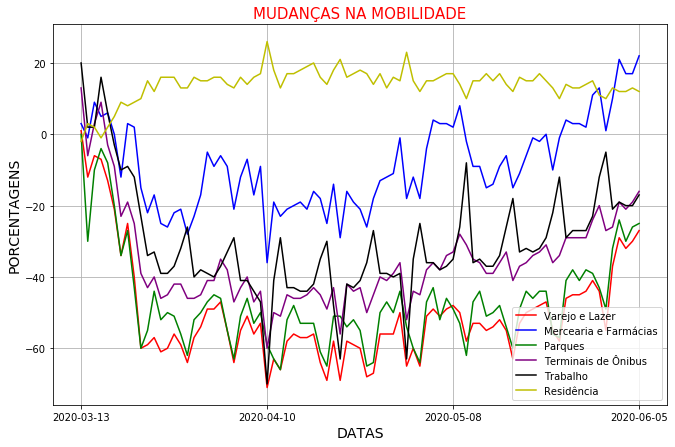

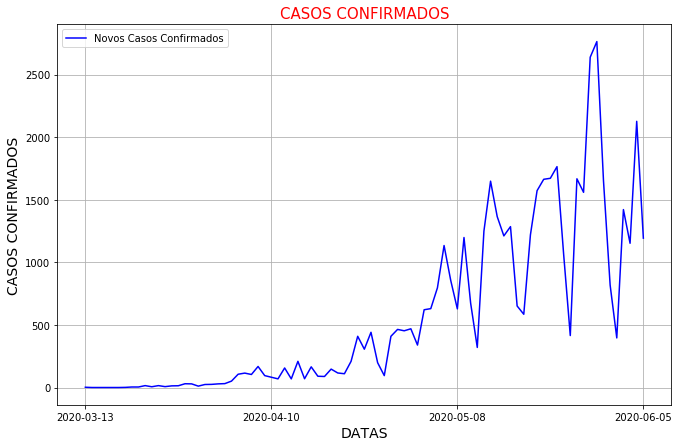

In [78]:
#plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(datas, varejo_lazer, 'r', label='Varejo e Lazer')
plt.plot(datas, mercearia_farmacia, 'b', label='Mercearia e Farmácias')
plt.plot(datas, parques,'g', label='Parques')
plt.plot(datas, terminais,  color='purple', label='Terminais de Ônibus')
plt.plot(datas, trabalho, color='black', label='Trabalho')
plt.plot(datas, residencia, 'y', label='Residência')
plt.legend()
plt.grid()
plt.title('MUDANÇAS NA MOBILIDADE', fontsize = 15, color= 'red')
plt.xlabel('DATAS', fontsize = 14)
plt.ylabel('PORCENTAGENS', fontsize = 14)
plt.xticks(escolha)
plt.show()

plt.plot(datas, casos_confirmados, color='blue', label='Novos Casos Confirmados')
plt.legend()
plt.grid()
plt.title('CASOS CONFIRMADOS', fontsize = 15, color= 'red')
plt.xlabel('DATAS', fontsize = 14)
plt.ylabel('CASOS CONFIRMADOS', fontsize = 14)
plt.xticks(escolha)
plt.show()